In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

DEMOGRAPHICS_CSV = "../../Dataset/Demographics/demographics.csv"
SENSING_CSV = "../../Dataset/Sensing/sensing.csv"

df = pd.read_csv(DEMOGRAPHICS_CSV)
sensing_df = pd.read_csv(SENSING_CSV)


In [8]:
'''
Merging sensing data with demographics data //src: catherines notebook 
'''
sensing_df['formatted_day'] = pd.to_datetime(sensing_df['day'].astype(str), format='%Y%m%d')
# Adds new column for day of the week
sensing_df['day_of_week'] = sensing_df['formatted_day'].dt.day_name()
sensing_df = sensing_df.merge(df[['uid', 'gender', 'race']], on='uid', how='left')

duration_by_day = sensing_df.groupby('day_of_week')['unlock_duration_ep_0'].sum()
duration_by_day = duration_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Unlock duration by day of week:
day_of_week
Monday       3.702689e+08
Tuesday      3.684988e+08
Wednesday    3.684131e+08
Thursday     3.664634e+08
Friday       3.617221e+08
Saturday     3.555307e+08
Sunday       3.693384e+08
Name: unlock_duration_ep_0, dtype: float64


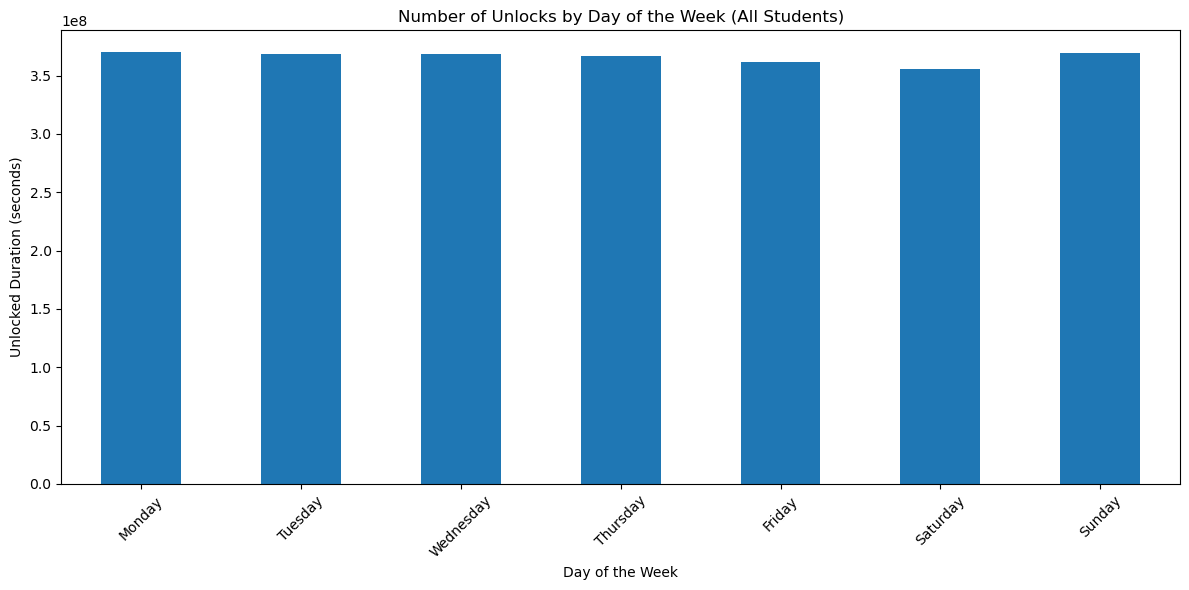

In [13]:
print("Unlock duration by day of week:")
print(duration_by_day)

# Create a bar chart for unlocks by day of the week
plt.figure(figsize=(12, 6))
duration_by_day.plot(kind='bar')
plt.title('Unlocked Duration by Day of the Week (All Students)')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
duration_by_day_gender = sensing_df.groupby(['day_of_week', 'gender'])['unlock_duration_ep_0'].sum().unstack()
# unstack() so gender is column value (for readability)
duration_by_day_gender = duration_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_gender)

gender,F,M,both
day_of_week,,,
Monday,2.583258e+08,1.064559e+08,3071899.136
Tuesday,2.574967e+08,1.057363e+08,2969154.806
Wednesday,2.563725e+08,1.066528e+08,2960574.375
Thursday,2.555282e+08,1.056695e+08,3007082.372
Friday,2.524386e+08,1.039241e+08,3002857.801
Saturday,2.496763e+08,1.004375e+08,3044099.303
Sunday,2.584764e+08,1.055080e+08,3048864.350


<Figure size 3000x600 with 0 Axes>

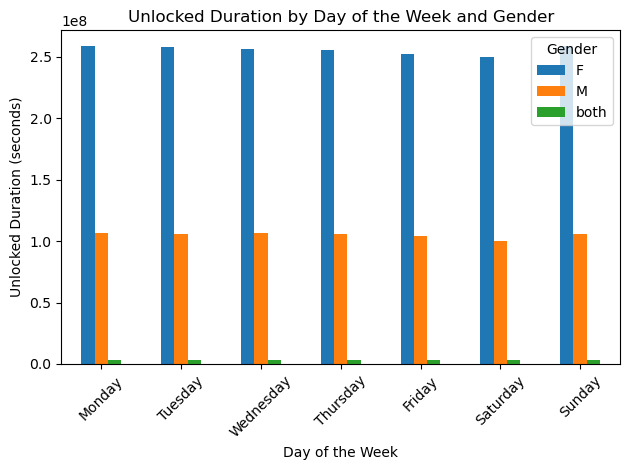

In [17]:
plt.figure(figsize=(30, 6))
duration_by_day_gender.plot(kind='bar')
plt.title('Unlocked Duration by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
duration_by_day_race = sensing_df.groupby(['day_of_week', 'race'])['unlock_duration_ep_0'].sum().unstack()
duration_by_day_race = duration_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_race)

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,1860057.419,4295806.544,2702756.680,9.227054e+07,1.718890e+07,1.893580e+07,9.871327e+06,2.207285e+08
Tuesday,1816892.134,4043211.949,2719711.467,9.190663e+07,1.728844e+07,1.887236e+07,1.010345e+07,2.194515e+08
Wednesday,1737493.965,4255524.372,2822030.737,9.229825e+07,1.719057e+07,1.874749e+07,9.995644e+06,2.189389e+08
Thursday,1711534.788,3986100.475,2764191.728,9.185891e+07,1.704259e+07,1.880426e+07,1.010048e+07,2.179367e+08
Friday,1724178.338,4032139.020,2554541.004,9.134515e+07,1.669448e+07,1.829758e+07,1.013320e+07,2.145843e+08
Saturday,1640925.333,3710806.375,2492619.764,9.029305e+07,1.691283e+07,1.865939e+07,9.747884e+06,2.097004e+08
Sunday,1573298.806,3800640.664,2651678.238,9.215369e+07,1.740820e+07,1.894257e+07,9.907740e+06,2.205954e+08


<Figure size 3000x600 with 0 Axes>

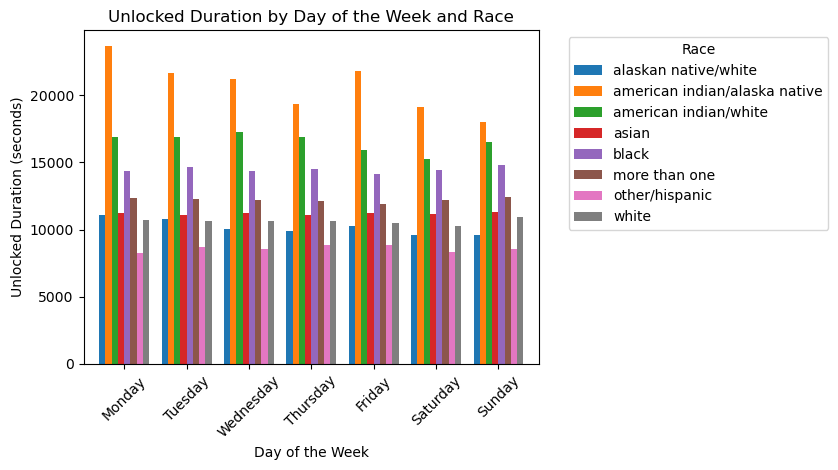

In [34]:
plt.figure(figsize=(30, 6))
duration_by_day_race.plot(kind='bar', width=0.8)
plt.title('Unlocked Duration by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust right margin to prevent legend cutoff
plt.show()

In [23]:
duration_by_day_gender = sensing_df.groupby(['day_of_week', 'gender'])['unlock_duration_ep_0'].median().unstack()
# unstack() so gender is column value (for readability)
duration_by_day_gender = duration_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_gender)

gender,F,M,both
day_of_week,,,
Monday,11011.668,10908.752,13935.7160
Tuesday,10941.270,10782.973,13028.1080
Wednesday,10913.170,10846.053,13464.2840
Thursday,10923.135,10764.705,13477.3975
Friday,10892.226,10544.878,13879.4140
Saturday,10757.541,10228.886,13099.0010
Sunday,11244.354,10787.118,12977.5580


<Figure size 3000x600 with 0 Axes>

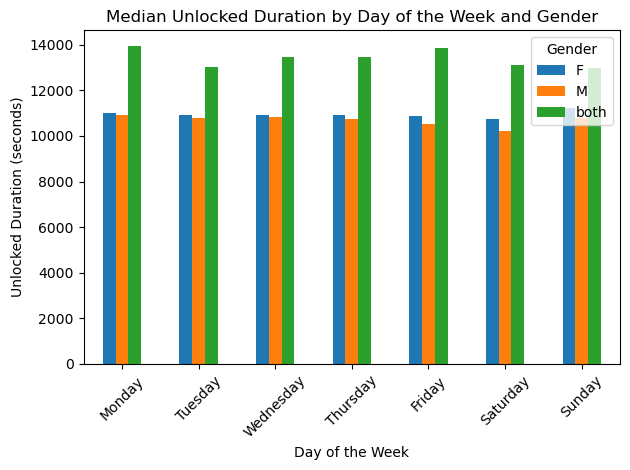

In [24]:
plt.figure(figsize=(30, 6))
duration_by_day_gender.plot(kind='bar')
plt.title('Median Unlocked Duration by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
duration_by_day_race = sensing_df.groupby(['day_of_week', 'race'])['unlock_duration_ep_0'].median().unstack()
duration_by_day_race = duration_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_race)

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,11071.9415,23633.4145,16900.7465,11204.3170,14349.5650,12337.9710,8290.1300,10742.6990
Tuesday,10809.9840,21623.0470,16910.9290,11043.8900,14653.1280,12305.8420,8670.3360,10644.1690
Wednesday,10040.3585,21175.9995,17229.7655,11198.6770,14384.7630,12169.0670,8549.9910,10620.3610
Thursday,9915.4280,19337.6180,16861.7075,11101.7450,14514.4120,12111.4265,8843.1620,10635.8750
Friday,10280.3190,21791.5060,15896.6105,11208.5730,14160.2965,11870.4125,8848.0995,10455.3945
Saturday,9556.6265,19076.9900,15274.8960,11135.3520,14450.5120,12188.2700,8350.7720,10244.9490
Sunday,9608.1145,17996.5325,16530.5150,11269.4685,14813.8605,12424.1800,8525.9955,10904.8180


<Figure size 3000x600 with 0 Axes>

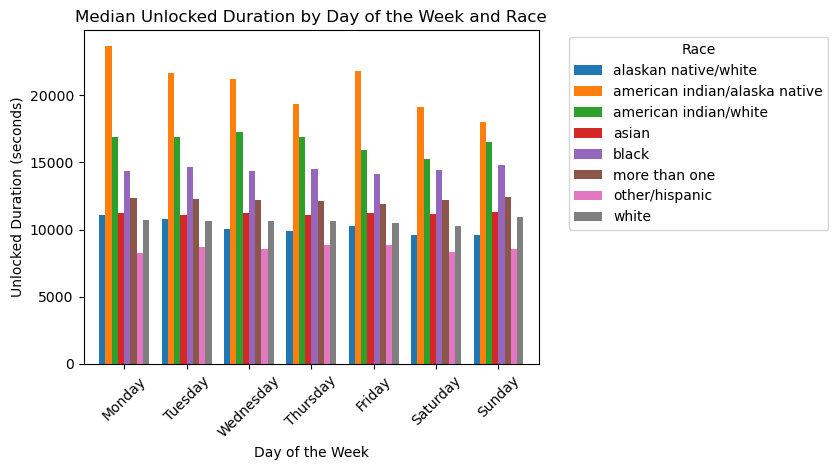

In [33]:
plt.figure(figsize=(30, 6))
duration_by_day_race.plot(kind='bar', width=0.8)
plt.title('Median Unlocked Duration by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust right margin to prevent legend cutoff
plt.show()

gender,F,M,both
day_of_week,,,
Monday,12091.075988,11686.893891,15999.474667
Tuesday,12031.993133,11576.123873,15627.130558
Wednesday,11969.957155,11634.430054,15500.389398
Thursday,11940.568288,11568.813320,15661.887354
Friday,11859.370559,11429.025698,15639.884380
Saturday,11699.919129,11026.183930,15772.535249
Sunday,12098.688804,11599.381506,15797.224611


<Figure size 3000x600 with 0 Axes>

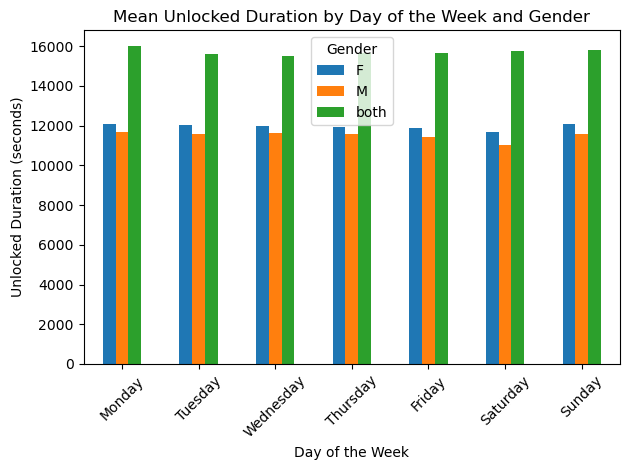

In [38]:
duration_by_day_gender = sensing_df.groupby(['day_of_week', 'gender'])['unlock_duration_ep_0'].mean().unstack()
# unstack() so gender is column value (for readability)
duration_by_day_gender = duration_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_gender)
plt.figure(figsize=(30, 6))
duration_by_day_gender.plot(kind='bar')
plt.title('Mean Unlocked Duration by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,11341.813530,24975.619442,16480.223659,12317.520255,14972.911350,12785.820067,9039.676855,11645.481709
Tuesday,11078.610573,23507.046215,16583.606506,12220.001078,14955.400684,12708.658021,9218.480036,11570.172256
Wednesday,10594.475396,24741.420767,17207.504494,12242.771337,14819.454263,12590.654951,9062.233755,11532.206418
Thursday,10310.450530,23041.043208,16854.827610,12220.155652,14781.080888,12620.310089,9215.764785,11490.310596
Friday,10449.565685,23307.161965,15768.771630,12203.760672,14516.935368,12329.903127,9296.516329,11376.539524
Saturday,10005.642274,21449.747832,15482.110335,12066.423668,14605.208810,12556.793330,8853.663919,11085.872938
Sunday,9593.285402,22096.748047,16267.964650,12300.279125,15058.998552,12773.140725,9023.442488,11656.296293


<Figure size 3000x600 with 0 Axes>

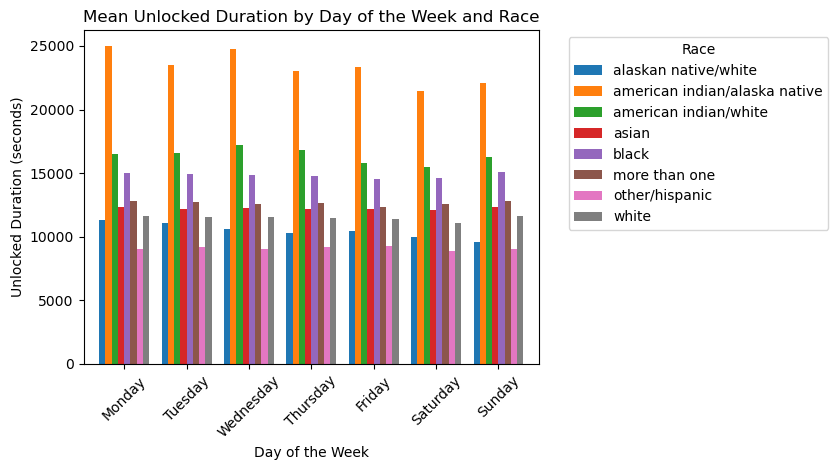

In [39]:
duration_by_day_race = sensing_df.groupby(['day_of_week', 'race'])['unlock_duration_ep_0'].mean().unstack()
duration_by_day_race = duration_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_race)
plt.figure(figsize=(30, 6))
duration_by_day_race.plot(kind='bar', width=0.8)
plt.title('Mean Unlocked Duration by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust right margin to prevent legend cutoff
plt.show()

gender,F,M,both
day_of_week,,,
Monday,65549.413,66188.335,37758.416
Tuesday,76212.590,74290.761,36427.333
Wednesday,67434.769,63132.289,37708.546
Thursday,66966.784,59928.976,44124.237
Friday,81767.750,64828.583,39939.489
Saturday,63995.783,71465.319,40548.363
Sunday,66695.702,70085.443,45894.011


<Figure size 3000x600 with 0 Axes>

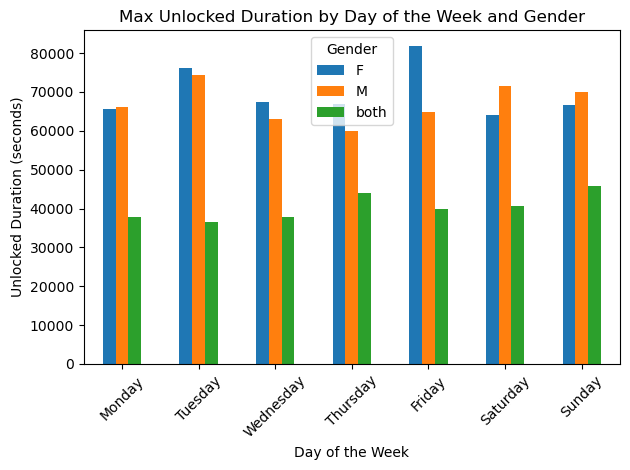

In [40]:
duration_by_day_gender = sensing_df.groupby(['day_of_week', 'gender'])['unlock_duration_ep_0'].max().unstack()
# unstack() so gender is column value (for readability)
duration_by_day_gender = duration_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_gender)
plt.figure(figsize=(30, 6))
duration_by_day_gender.plot(kind='bar')
plt.title('Max Unlocked Duration by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,23315.103,61495.446,33991.108,65074.049,61995.938,32101.475,37844.957,66188.335
Tuesday,27002.488,59818.381,31931.892,58858.599,51612.640,34232.113,34445.691,76212.590
Wednesday,23831.179,64574.803,32085.896,62641.928,67434.769,31241.924,37033.072,62713.261
Thursday,30210.168,62999.943,30913.529,59494.024,46141.324,37754.937,35114.070,66966.784
Friday,23226.618,81767.750,34726.166,57681.898,49413.018,34315.079,27670.440,64828.583
Saturday,24327.811,63758.258,32957.159,58528.016,49422.998,38763.706,32656.384,71465.319
Sunday,21770.525,66695.702,34541.109,61850.537,58304.803,35964.221,42012.812,70085.443


<Figure size 3000x600 with 0 Axes>

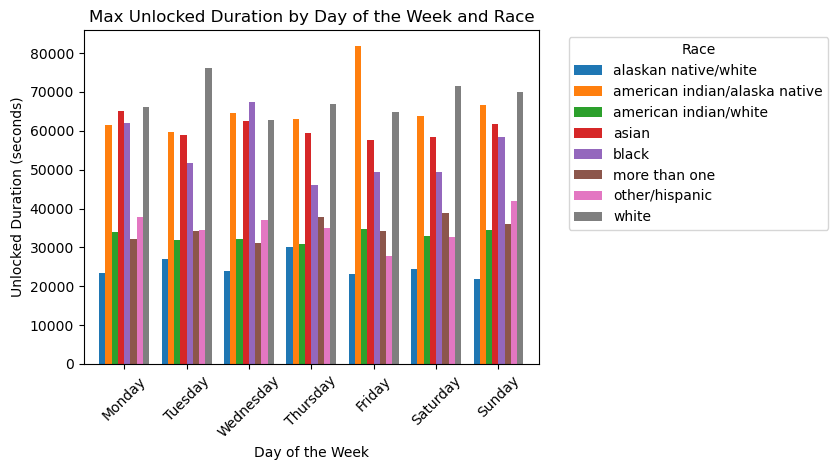

In [41]:
duration_by_day_race = sensing_df.groupby(['day_of_week', 'race'])['unlock_duration_ep_0'].max().unstack()
duration_by_day_race = duration_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_race)
plt.figure(figsize=(30, 6))
duration_by_day_race.plot(kind='bar', width=0.8)
plt.title('Max Unlocked Duration by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust right margin to prevent legend cutoff
plt.show()

gender,F,M,both
day_of_week,,,
Monday,0.0,0.0,0.000
Tuesday,0.0,0.0,709.655
Wednesday,0.0,0.0,0.000
Thursday,0.0,0.0,620.141
Friday,0.0,0.0,0.000
Saturday,0.0,0.0,0.000
Sunday,0.0,0.0,0.000


<Figure size 3000x600 with 0 Axes>

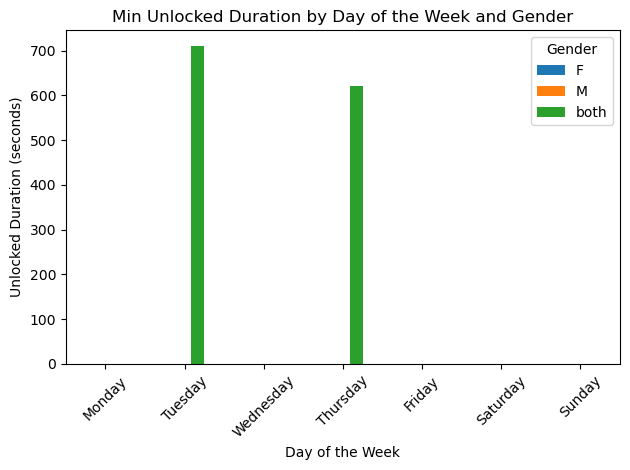

In [42]:
duration_by_day_gender = sensing_df.groupby(['day_of_week', 'gender'])['unlock_duration_ep_0'].min().unstack()
# unstack() so gender is column value (for readability)
duration_by_day_gender = duration_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_gender)
plt.figure(figsize=(30, 6))
duration_by_day_gender.plot(kind='bar')
plt.title('Min Unlocked Duration by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,0.0,2824.731,0.0,0.0,0.0,0.0,0.0,0.0
Wednesday,0.0,2983.410,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,0.0,3049.420,0.0,0.0,0.0,0.0,0.0,0.0
Friday,0.0,253.814,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,371.573,0.0,0.0,0.0,0.0,0.0,0.0
Sunday,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 3000x600 with 0 Axes>

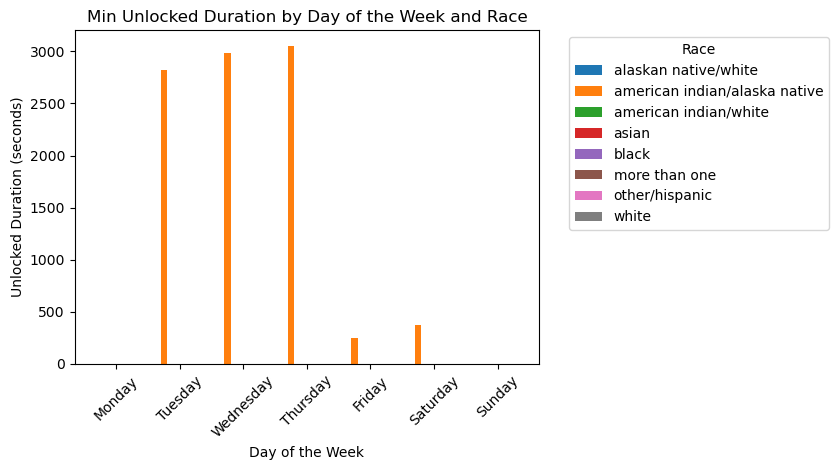

In [43]:
duration_by_day_race = sensing_df.groupby(['day_of_week', 'race'])['unlock_duration_ep_0'].min().unstack()
duration_by_day_race = duration_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(duration_by_day_race)
plt.figure(figsize=(30, 6))
duration_by_day_race.plot(kind='bar', width=0.8)
plt.title('Min Unlocked Duration by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Unlocked Duration (seconds)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust right margin to prevent legend cutoff
plt.show()